In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
np.set_printoptions(suppress=True)
import pandas as pd
from numpy import linalg as LA

# Номер 3

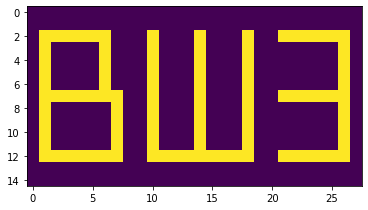

In [2]:
a = np . zeros ((15 , 28))
a [2: -2 ,1] = 1; a [2 ,2:6] = 1
a [2:7 ,6] = 1; a [7: -2 ,7] = 1
a [7 ,2:7] = 1; a [ -3 ,2:7] = 1
a [2: -2 , 10] = 1; a [2: -2 , 14] = 1;
a [2: -2 , 18] = 1; a [ -3 ,10:19] = 1
a [2: -2 ,26] = 1; a [2 ,21:26] = 1
a [7 ,21:26] = 1; a [-3 ,21:26] = 1
plt.imshow(a)

In [3]:
u,s,v = np.linalg.svd(a)

In [4]:
np.linalg.matrix_rank(a)

5

In [5]:
smat = np.zeros((15, 28), dtype=float)
smat[:15, :15] = np.diag(s)

In [6]:
temp = []
for i in range(1,6):
    temp.append( u[:,0:i] @ smat[0:i,0:i] @ v[0:i,:])

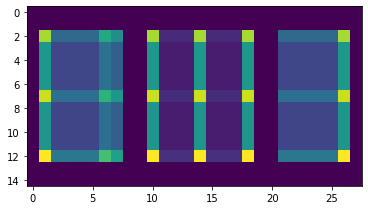

In [7]:
plt.imshow(temp[0])

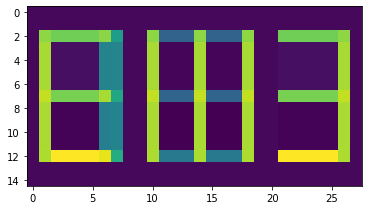

In [8]:
plt.imshow(temp[1])

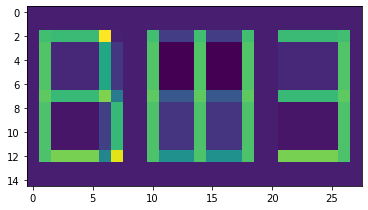

In [9]:
plt.imshow(temp[2])

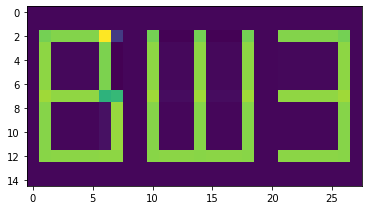

In [10]:
plt.imshow(temp[3])

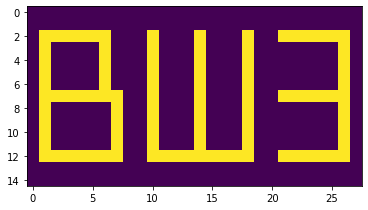

In [11]:
plt.imshow(temp[4])

# Номер 4

In [12]:
A = np.array([[19/2, 17/2, 15/2, 13/2, 11/2, 9/2, 7/2, 5/2, 3/2, 1/2], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])
a = np.array([1, 0])

In [13]:
u, s, v = np.linalg.svd(A, full_matrices=False)
f = v.T @ np.diag(1 / s).T @ u.T @ a
f

array([ 0.05454545,  0.04242424,  0.03030303,  0.01818182,  0.00606061,
       -0.00606061, -0.01818182, -0.03030303, -0.04242424, -0.05454545])

In [14]:
print(u @ np.diag(s) @ v @ f)

[ 1. -0.]


# Номер 5

In [15]:
C = np.array([[1, 0.9, 0.7], [0.9, 1, 0.4], [0.7, 0.4, 1]])
C

array([[1. , 0.9, 0.7],
       [0.9, 1. , 0.4],
       [0.7, 0.4, 1. ]])

In [16]:
C_temp = np.array([[1, 0.9, 0.7], [0.9, 1, 0.3], [0.7, 0.3, 1]])
C_temp

array([[1. , 0.9, 0.7],
       [0.9, 1. , 0.3],
       [0.7, 0.3, 1. ]])

In [17]:
w, v = LA.eig(C)
w_temp,v_temp = LA.eig(C_temp)
print('Собственные значения обычной мартицы: \n', w)
print('Собственные значения возмущенной мартицы: \n', w_temp)
print('Собственные вектора возмущенной мартицы: \n', v_temp)

Собственные значения обычной мартицы: 
 [2.35363603 0.03034736 0.6160166 ]
Собственные значения возмущенной мартицы: 
 [ 2.29672779 -0.00735244  0.71062465]
Собственные вектора возмущенной мартицы: 
 [[ 0.65991684  0.74767038 -0.0741536 ]
 [ 0.57099598 -0.5632171  -0.5972856 ]
 [ 0.48833733 -0.35181742  0.79859323]]


In [18]:
w_temp[w_temp < 0] = 0
B_temp = v_temp * np.sqrt(w_temp)

In [19]:
norm1 = B_temp[0] / LA.norm(B_temp[0])
norm2 = B_temp[1] / LA.norm(B_temp[1])
norm3 = B_temp[2] / LA.norm(B_temp[2])
B = np.array([norm1, norm2, norm3])

In [20]:
C_final = B @ B.transpose()
C_final

array([[1.        , 0.89402441, 0.69631907],
       [0.89402441, 1.        , 0.30096904],
       [0.69631907, 0.30096904, 1.        ]])

In [21]:
LA.eigvals(C_final)

array([ 2.29039373, -0.        ,  0.70960627])

In [22]:
print(LA.det(C_final[1:,1:]))
print(LA.det(C_final[:2,:2]))
print(LA.det(C_final))
print(LA.det(np.array([[1., 0.69631907], [0.69631907, 1.]])))

0.9094176393062732
0.20072035699084964
-3.1517517354243004e-16
0.515139752754335
